In [110]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
import imutils
import skimage.exposure



In [111]:
import cv2
image = cv2.imread("/home/nipun/Documents/Uni_Malta/Datasets/Datasets/Miche/Miche_Dataset/train_img/075_GT2_IN_F_LI_01_2.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
mask_path = "/home/nipun/Documents/Uni_Malta/Datasets/Datasets/Miche/Miche_Dataset/train_masks/075_GT2_IN_F_LI_01_2.bmp"
hh, ww = image.shape[:2]
ori_image = image.copy()
raw_image = cv2.imread(mask_path)
image = cv2.resize(image,(300,300))
raw_image = cv2.resize(raw_image,(300,300))

In [112]:
print(image.shape)
print(raw_image.shape)

(300, 300, 3)
(300, 300, 3)


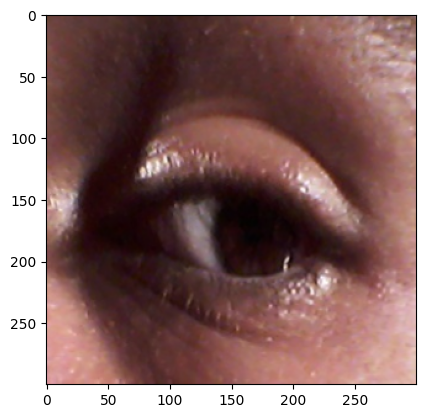

In [113]:
plt.imshow(image)

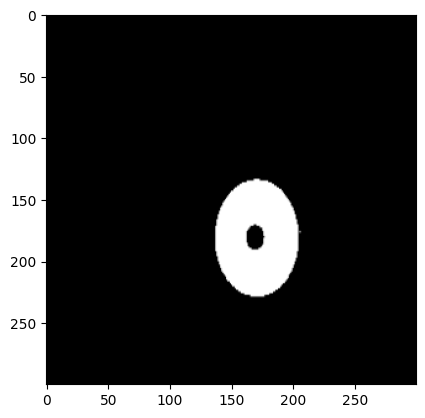

In [114]:
plt.imshow(raw_image)

In [115]:
print(np.unique(raw_image))

[  0   1   2   3   5   6   8   9  10  11  12  13  14  15  16  17  20  21
  24  25  26  27  28  30  32  33  34  35  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  53  57  58  60  63  67  68  70  71  74  75  78
  80  81  83  85  86  87  88  89  92  94  95  97  98 101 102 103 104 106
 108 109 112 114 115 116 117 119 121 122 124 126 131 132 133 136 137 138
 139 143 145 146 150 152 153 156 158 159 160 163 165 166 167 168 170 172
 173 175 176 177 179 180 181 182 183 184 185 187 188 190 192 193 194 195
 196 197 200 202 203 204 205 206 207 208 210 211 212 213 214 215 217 218
 220 221 222 223 224 225 226 227 228 230 231 233 234 235 236 237 238 240
 241 242 243 244 245 246 247 248 250 251 252 253 254 255]


In [116]:
gray = cv2.cvtColor(raw_image,cv2.COLOR_BGR2GRAY)
median = cv2.medianBlur(gray, 5)
# blur = cv2.GaussianBlur(gray, (5, 5), 0)


# print(np.min(blur))
# print(np.max(blur))

In [117]:
thresh2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1]

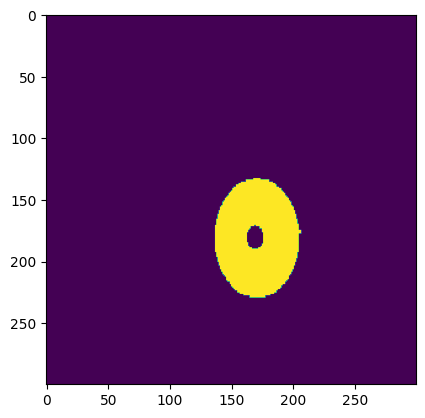

In [118]:
plt.imshow(thresh2)

In [119]:
edge_detected_image = cv2.Canny(gray, 0, 200)

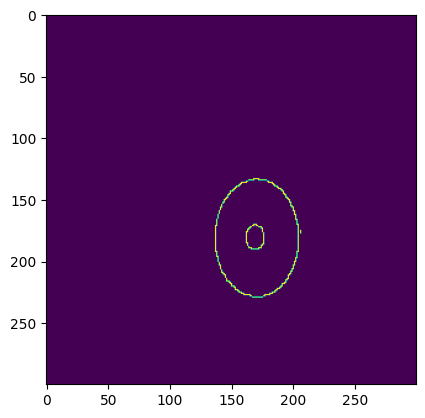

In [120]:
plt.imshow(edge_detected_image)

In [121]:
# plt.imshow(blur)

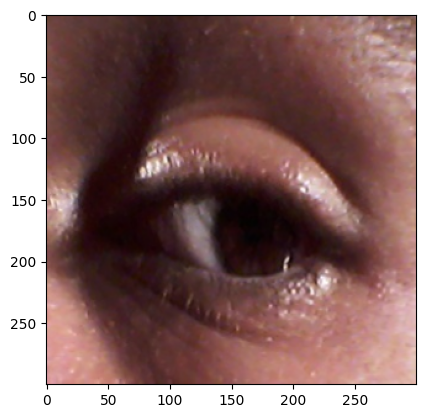

In [122]:
plt.imshow(image)

In [123]:
cnts,_ = cv2.findContours(median,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

bg_mask = np.zeros_like(raw_image)



In [124]:
max_contour = 0
for contour in cnts:
    # approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    area = cv2.contourArea(contour)
    
    
    if area > max_contour:
        cv2.drawContours(bg_mask,[contour],0,(0,0,255),-1)
    else:
        cv2.drawContours(bg_mask,[contour],0,(0,255,0),-1)
    
    
    max_contour = area
    
    
    print(area)
   


5119.0
213.0


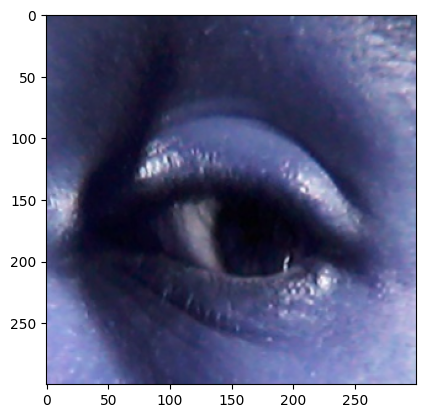

In [125]:

plt.imshow(image[:,:,::-1])
# plt.imshow(raw_image,alpha=0.4)

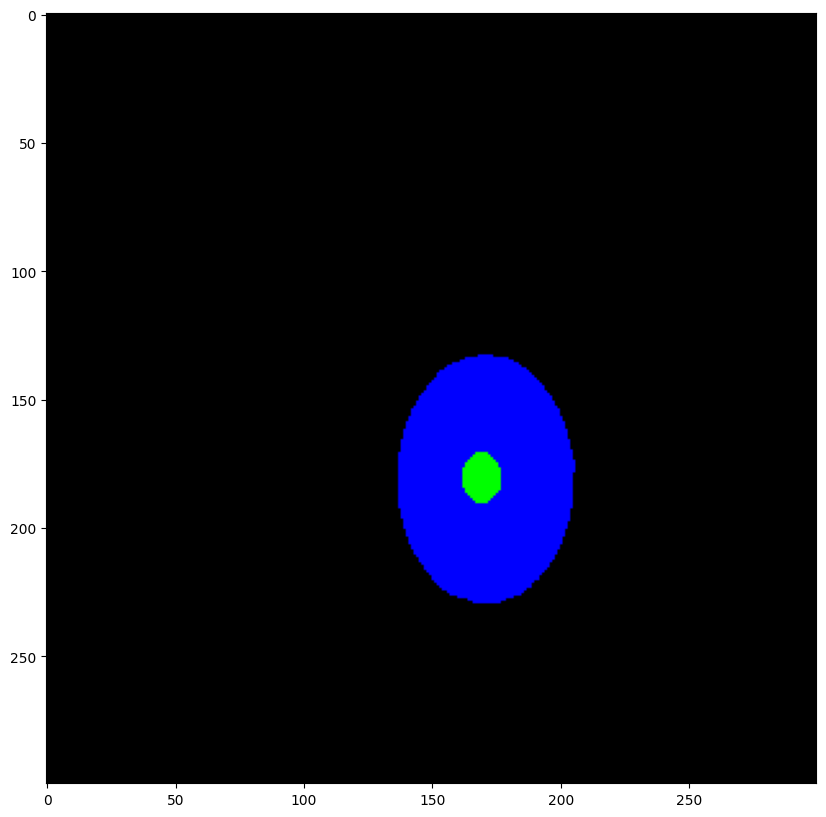

In [126]:
plt.figure(figsize = (20,10))
plt.imshow(bg_mask)

In [127]:
def rgb2mask(rgb):
    
    mask = np.zeros((rgb.shape[0], rgb.shape[1]))

    for k,v in color_map.items():
        mask[np.all(rgb==v, axis=2)] = k
        
    return mask

In [128]:
mask = rgb2mask(bg_mask)

In [129]:
print(np.unique(bg_mask))
print(np.count_nonzero((bg_mask == [0, 0, 255]).all(axis = 2)))

# b = np.where(bg_mask>0,1)

[  0 255]
5002


In [130]:
color_map = {0:[0,0,0],1:[0,255,0],2:[0,0,255]}


In [132]:
output_mask = []
for i,color in  enumerate(color_map.values()):
    cmap = np.all(np.equal(bg_mask,color),axis=2)
    cv2.imwrite(f"mask{i}.png",cmap*255)
    output_mask.append(cmap)
    
output_mask = np.stack(output_mask,axis=-1)

In [133]:
print(output_mask.shape)

(300, 300, 3)


In [134]:



grayscale_mask = np.argmax(output_mask, axis=-1)
grayscale_mask = (grayscale_mask / len(color_map)) * 255
grayscale_mask = np.expand_dims(grayscale_mask, axis=-1)


    

In [135]:
np.unique(grayscale_mask)


array([  0.,  85., 170.])

In [136]:
cv2.imwrite("grayscale.png",grayscale_mask)

True

In [37]:
def process_mask(rgb_mask, colormap):
    output_mask = []

    for i, color in enumerate(colormap):
        cmap = np.all(np.equal(rgb_mask, color), axis=-1)
        output_mask.append(cmap)
        
    print(len(output_mask))

    output_mask = np.stack(output_mask, axis=-1)
    return output_mask

In [38]:
processed_mask = process_mask(bg_mask,color_map)

3


In [39]:
grayscale_mask = np.argmax(processed_mask, axis=-1)
grayscale_mask = (grayscale_mask / len(color_map)) * 255
grayscale_mask = np.expand_dims(grayscale_mask, axis=-1)

In [102]:
grayscale_mask.shape

(300, 300, 1)

In [103]:
print(np.unique(grayscale_mask))

[  0.  85. 170.]


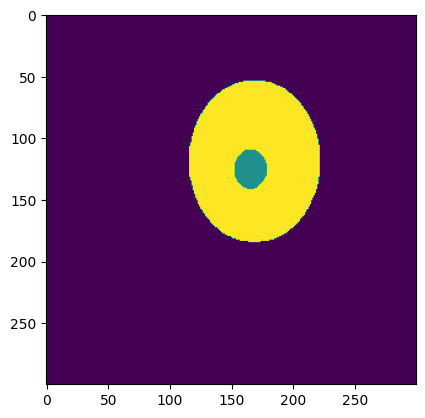

In [41]:
plt.imshow(grayscale_mask)

In [78]:
# Pytorch Multiclas

In [1]:
# Check whether Mask is binary or Not


In [2]:
import cv2
import numpy as np
import os

In [66]:
image_path = "/home/nipun/Documents/Uni_Malta/Datasets/ubipr1/single_eye/C1_S1_I1_L.png"
mask_img = cv2.imread(image_path)
mask_img = cv2.cvtColor(mask_img,cv2.COLOR_BGR2GRAY)

In [67]:
print(np.unique(mask_img))

[  0  85 170 255]


In [147]:
mask_path = "/home/nipun/Documents/Uni_Malta/Datasets/Datasets/Miche/MICHE_MULTICLASS/Dataset/train_masks/001_GS4_IN_F_RI_01_1.png"

In [148]:
from PIL import Image

image = Image.open(mask_path)

In [149]:
print(np.unique(np.array(image)))

[  0  85 170]


In [145]:
image_cv2 = cv2.imread(mask_path,0)

In [146]:
print(np.unique(image_cv2))

[  0  85 170]
